<a href="https://colab.research.google.com/github/Umang233/-Assignment-Data-Analytics/blob/main/featureextraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2,SelectKBest,RFE
from yellowbrick.model_selection import rfecv
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Pima.csv', index_col=0)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x=df.iloc[:,:-1]
y=df["class"]

In [5]:
x

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [8]:
test=SelectKBest(score_func=chi2,k=5)

In [11]:
test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x7a8379cc9360>)

In [12]:
test.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [17]:
chi_1=pd.DataFrame(test.scores_).T
chi_1.columns=x.columns

In [18]:
chi_1

,preg,plas,pres,skin,test,mass,pedi,age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
rfe=RFE(LogisticRegression())

In [21]:
rfe.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression())

In [22]:
rfe_df=pd.DataFrame(rfe.ranking_).T
rfe_df.columns=x.columns
rfe_df

,preg,plas,pres,skin,test,mass,pedi,age
0,1,1,3,4,5,1,1,2


In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [28]:
rfe=RFE(LogisticRegression())
rfe.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFE(estimator=LogisticRegression())

In [30]:
rfe.ranking_

array([ 1,  9,  7,  8, 10, 12, 11,  1,  1,  1,  1,  5,  6,  1,  1,  3,  1,
        1,  1,  2,  4])

In [31]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,baseline value
1,9,accelerations
2,7,fetal_movement
3,8,uterine_contractions
4,10,light_decelerations
5,12,severe_decelerations
6,11,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...


In [32]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,baseline value
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
13,1,histogram_max
14,1,histogram_number_of_peaks
16,1,histogram_mode
17,1,histogram_mean
18,1,histogram_median


In [33]:
from sklearn.tree import DecisionTreeClassifier

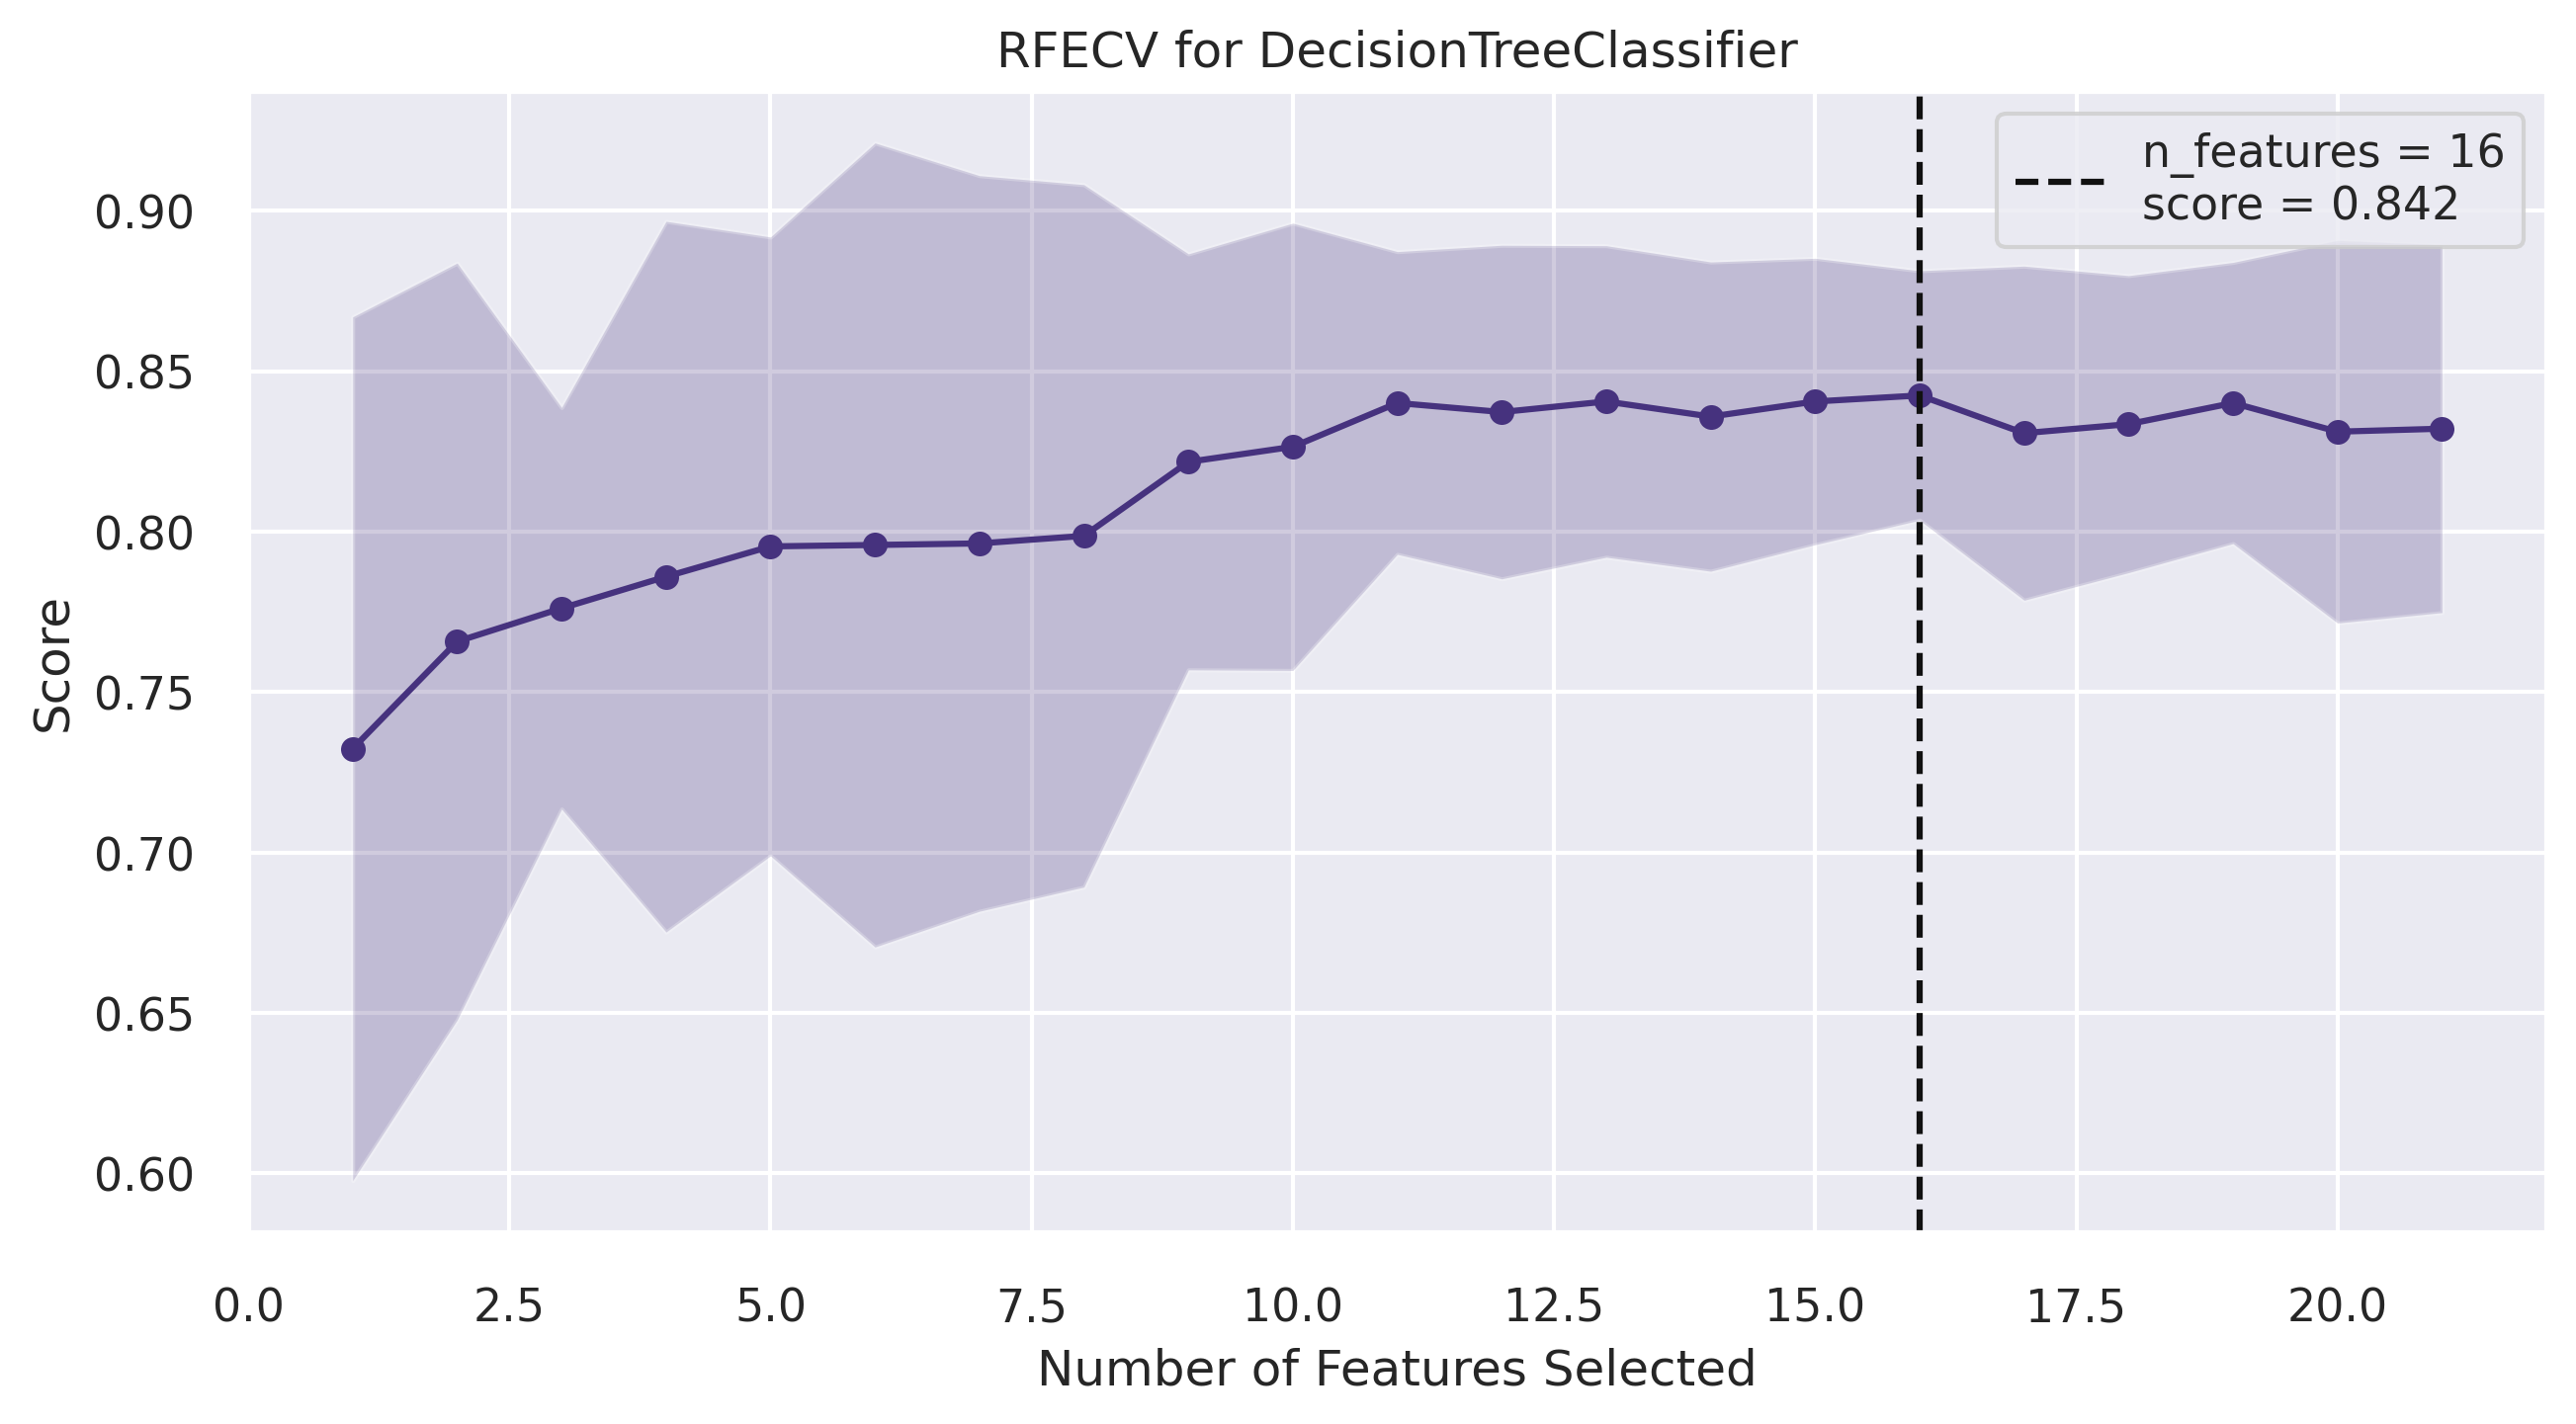

In [34]:
rfe_dt=rfecv(DecisionTreeClassifier(),x,y)

In [35]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe_dt.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,baseline value
1,1,accelerations
2,1,fetal_movement
3,1,uterine_contractions
4,4,light_decelerations
5,5,severe_decelerations
6,1,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...


In [36]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,baseline value
1,1,accelerations
2,1,fetal_movement
3,1,uterine_contractions
6,1,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
11,1,histogram_width


In [37]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [38]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'IG' : dt.feature_importances_
})

In [39]:
imp_cols

,Features,IG
0,baseline value,0.026996
1,accelerations,0.031029
2,fetal_movement,0.006862
3,uterine_contractions,0.024610
4,light_decelerations,0.005213
5,severe_decelerations,0.000000
6,prolongued_decelerations,0.014132
7,abnormal_short_term_variability,0.118907
8,mean_value_of_short_term_variability,0.248750
9,percentage_of_time_with_abnormal_long_term_var...,0.130059


In [40]:
imp_cols.sort_values(by = 'IG', ascending=False)

,Features,IG
8,mean_value_of_short_term_variability,0.248750
17,histogram_mean,0.216574
9,percentage_of_time_with_abnormal_long_term_var...,0.130059
7,abnormal_short_term_variability,0.118907
13,histogram_max,0.052263
1,accelerations,0.031029
0,baseline value,0.026996
3,uterine_contractions,0.024610
16,histogram_mode,0.022810
12,histogram_min,0.020174
